## Preparing Power Generation data

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model

import time

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [39]:
import pandas as pd
df = pd.read_csv('Data/power_actual.csv', parse_dates=['datetime'])
df.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


As we see that records in difference of 15 minutes each day so, we have to groupby data on minutes to form on hourly basis

In [40]:
df.shape

(70080, 5)

In [46]:
df = df.groupby([df['datetime'].dt.year,df['datetime'].dt.month,df['datetime'].dt.day, df['datetime'].dt.hour]).sum()
df[0:50]

TypeError: datetime64 type does not support sum operations

This is what we grouping the data on a year of month of day of hour by applying summation to form data as expected

In [4]:
df.tail(50)

,Unnamed: 0,datetime,ghi,gti,power
70030,70030,2019-09-30 11:30:00,NaN,NaN,0.0
70031,70031,2019-09-30 11:45:00,NaN,NaN,0.0
70032,70032,2019-09-30 12:00:00,NaN,NaN,0.0
70033,70033,2019-09-30 12:15:00,NaN,NaN,0.0
70034,70034,2019-09-30 12:30:00,NaN,NaN,0.0
70035,70035,2019-09-30 12:45:00,NaN,NaN,0.0
70036,70036,2019-09-30 13:00:00,NaN,NaN,0.0
70037,70037,2019-09-30 13:15:00,NaN,NaN,0.0
70038,70038,2019-09-30 13:30:00,NaN,NaN,0.0
70039,70039,2019-09-30 13:45:00,NaN,NaN,0.0


In [47]:
print(df.power)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70075    0.0
70076    0.0
70077    0.0
70078    0.0
70079    0.0
Name: power, Length: 70080, dtype: float64


In [49]:
df.index[0:][0]

0

In [51]:
df1 = pd.DataFrame({'year':[i for i,j,k,l in df.index],
                  'month':[j for i,j,k,l in df.index],
                  'day':[k for i,j,k,l in df.index],
                  'hour':[l for i,j,k,l in df.index]})
df1 = pd.to_datetime(df1)
df1

TypeError: cannot unpack non-iterable int object

In [50]:
df = pd.DataFrame({'datetime': df1, 'power': [i for i in df.power]})
df[0:100]

NameError: name 'df1' is not defined

In [11]:
df.shape

(17520, 2)

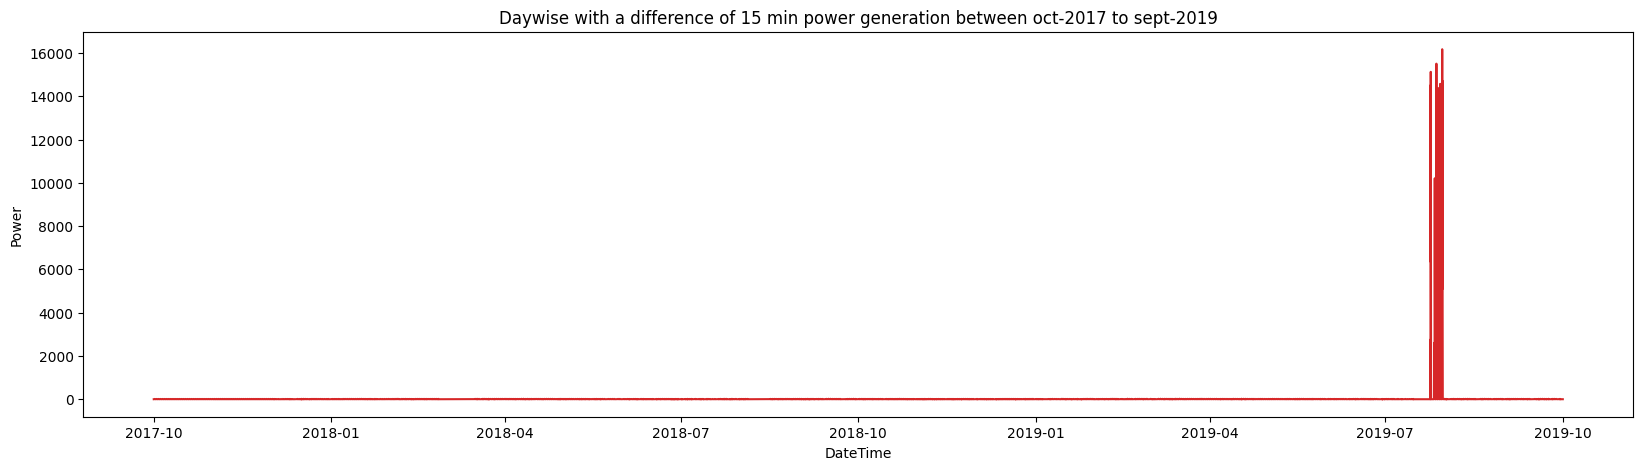

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Draw Plot
def plot_df(df, x, y, title="", xlabel='DateTime', ylabel='Power', dpi=100):
    plt.figure(figsize=(20,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.datetime, y=df.power, title='Daywise with a difference of 15 min power generation between oct-2017 to sept-2019')    


This plot shows unexpected behaviour as we are trying to understand it is having some outliers between `2019-07` and `2019-10`

### Predictors over time

      Unnamed: 0            datetime  ghi  gti  power
1              1 2017-10-01 00:15:00  0.0  0.0    0.0
2              2 2017-10-01 00:30:00  0.0  0.0    0.0
3              3 2017-10-01 00:45:00  0.0  0.0    0.0
4              4 2017-10-01 01:00:00  0.0  0.0    0.0
5              5 2017-10-01 01:15:00  0.0  0.0    0.0
...          ...                 ...  ...  ...    ...
8732        8732 2017-12-30 23:00:00  0.0  0.0    0.0
8733        8733 2017-12-30 23:15:00  0.0  0.0    0.0
8734        8734 2017-12-30 23:30:00  0.0  0.0    0.0
8735        8735 2017-12-30 23:45:00  0.0  0.0    0.0
8736        8736 2017-12-31 00:00:00  0.0  0.0    0.0

[8736 rows x 5 columns]


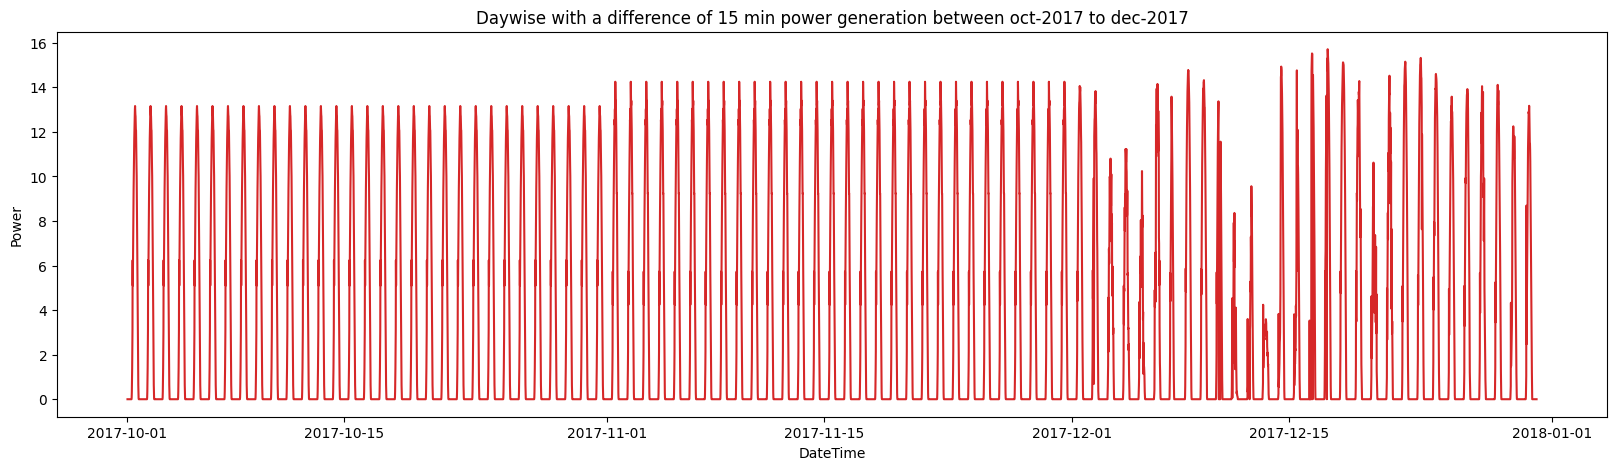

In [8]:
start_date = '2017-10-01'
end_date = '2017-12-31'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017') 

Clearly, Power plant would generate power daily increasing from `06:00:00` decreasing to `17:00:00`, As we see this is series of data repeting same structure daily

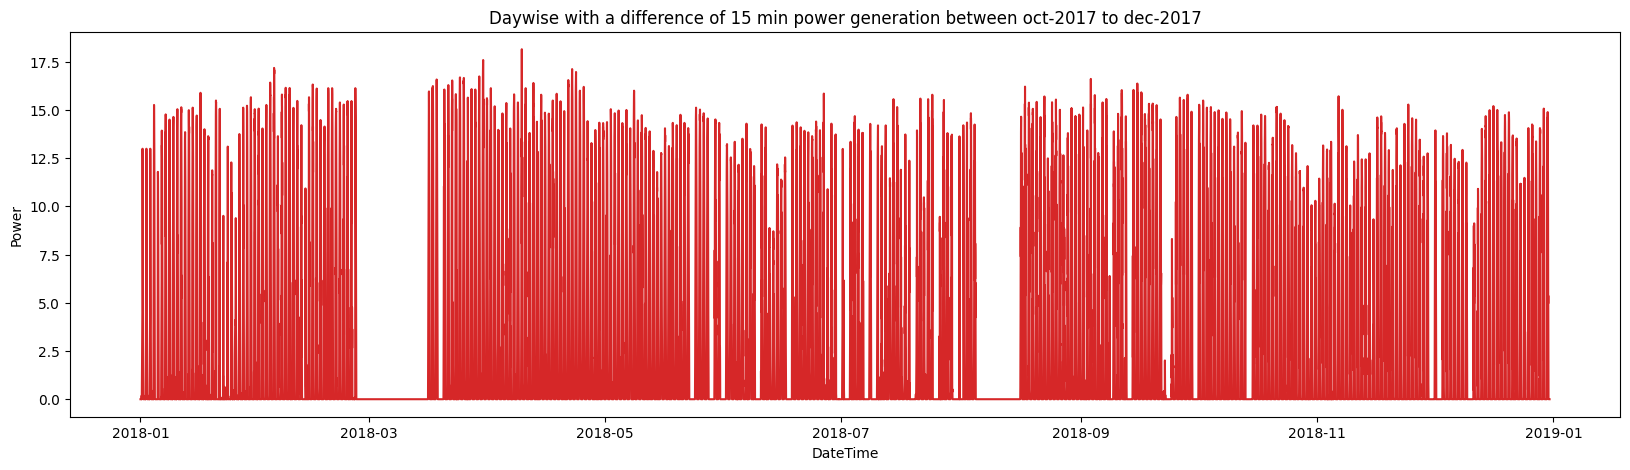

In [9]:
start_date = '2018-01-01'
end_date = '2018-12-31'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
# df_mask
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017') 

       Unnamed: 0            datetime  ghi  gti  power
43873       43873 2019-01-01 00:15:00  0.0  0.0    0.0
43874       43874 2019-01-01 00:30:00  0.0  0.0    0.0
43875       43875 2019-01-01 00:45:00  0.0  0.0    0.0
43876       43876 2019-01-01 01:00:00  0.0  0.0    0.0
43877       43877 2019-01-01 01:15:00  0.0  0.0    0.0
...           ...                 ...  ...  ...    ...
61244       61244 2019-06-30 23:00:00  0.0  0.0    0.0
61245       61245 2019-06-30 23:15:00  0.0  0.0    0.0
61246       61246 2019-06-30 23:30:00  0.0  0.0    0.0
61247       61247 2019-06-30 23:45:00  0.0  0.0    0.0
61248       61248 2019-07-01 00:00:00  0.0  0.0    0.0

[17376 rows x 5 columns]


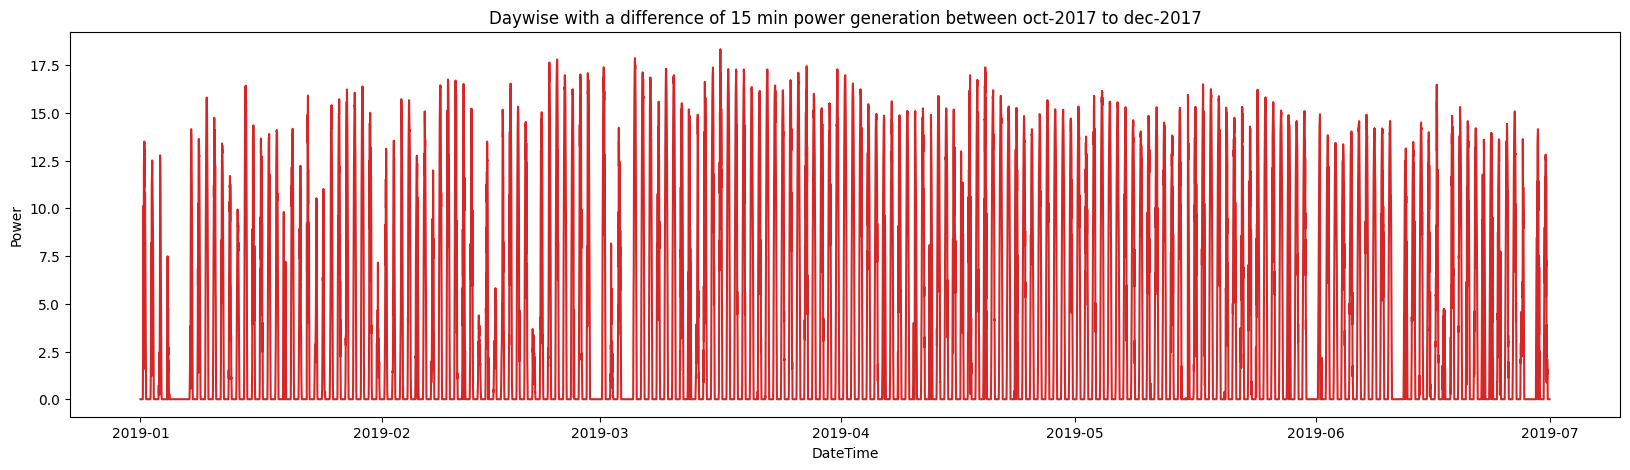

In [11]:
start_date = '2019-01-01'
end_date = '2019-07-01'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017') 

       Unnamed: 0            datetime  ghi  gti  power
63361       63361 2019-07-23 00:15:00  0.0  0.0    0.0
63362       63362 2019-07-23 00:30:00  0.0  0.0    0.0
63363       63363 2019-07-23 00:45:00  0.0  0.0    0.0
63364       63364 2019-07-23 01:00:00  0.0  0.0    0.0
63365       63365 2019-07-23 01:15:00  0.0  0.0    0.0
...           ...                 ...  ...  ...    ...
66044       66044 2019-08-19 23:00:00  0.0  0.0    0.0
66045       66045 2019-08-19 23:15:00  0.0  0.0    0.0
66046       66046 2019-08-19 23:30:00  0.0  0.0    0.0
66047       66047 2019-08-19 23:45:00  0.0  0.0    0.0
66048       66048 2019-08-20 00:00:00  0.0  0.0    0.0

[2688 rows x 5 columns]


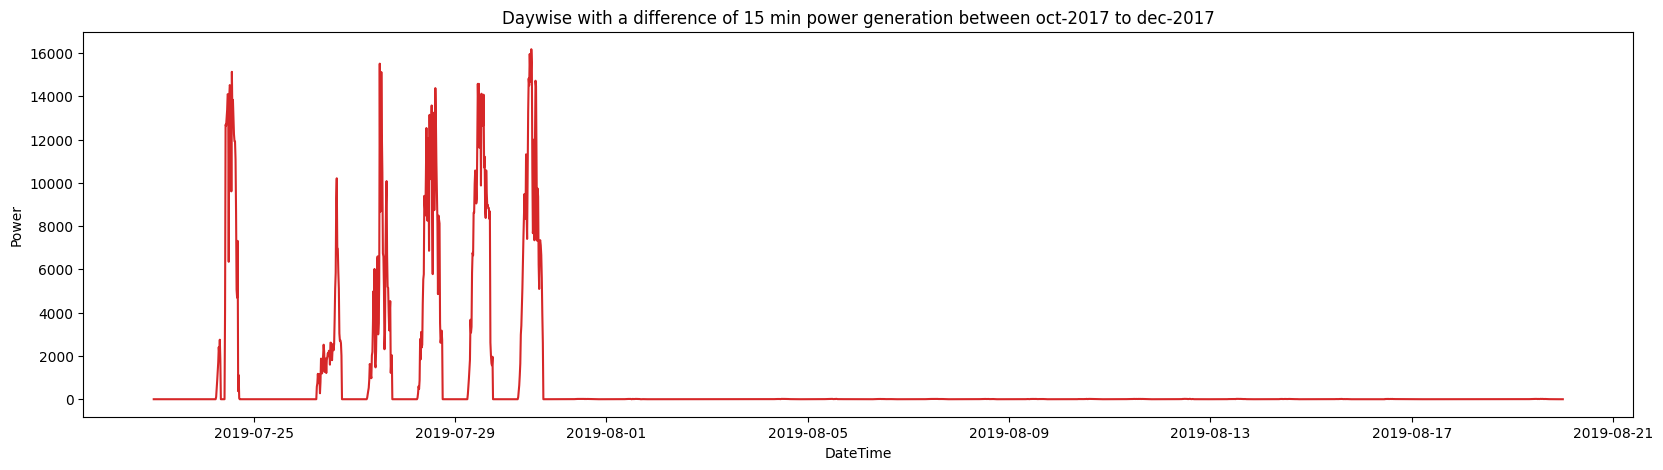

In [12]:
start_date = '2019-07-23'
end_date = '2019-08-20'
mask = (df.datetime > start_date) & (df.datetime <= end_date)
df_mask = df.loc[mask]
print(df_mask)
plot_df(df_mask, x=df_mask.datetime, y=df_mask.power, title='Daywise with a difference of 15 min power generation between oct-2017 to dec-2017') 

outliers also having the same series of power generation, values ranging from `0-60000`

In [13]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)

## Data Preparation

### Removing extra rows

In [52]:
print(df.shape)
df_weather_actual = pd.read_csv('Data/weather_actuals.csv')
print(df_weather_actual.shape)

(70080, 5)
(13619, 31)


this shows feature records are less than power records we take a clear look on data `df_weather_actual` doesn't having records from `2018-03-13 00:00:00` to `2018-08-15 12:00:00` and `2018-02-28 00:00:00'` to `2018-03-06 23:00:00`

In [2]:
start_date = '2018-03-12 23:00:00'
end_date = '2018-08-15 13:00:00'
df_drop_extra_rows = df
mask = (df_drop_extra_rows.datetime > start_date) & (df_drop_extra_rows.datetime < end_date)
df_mask = df_drop_extra_rows.loc[mask]
print(df_mask)

NameError: name 'df' is not defined

In [1]:
df_drop_extra_rows.drop(df_mask.index, inplace=True)

NameError: name 'df_drop_extra_rows' is not defined

In [21]:
start_date = '2018-02-27 23:00:00'
end_date = '2018-03-07 00:00:00'
mask = (df_drop_extra_rows.datetime > start_date) & (df_drop_extra_rows.datetime < end_date)
df_mask = df_drop_extra_rows.loc[mask]
# print(df_mask.shape)
df_drop_extra_rows.drop(df_mask.index, inplace=True)

# mask = (df_weather_actual.datetime_local >= start_date) & (df_weather_actual.datetime_local <= end_date)
# df_mask = df_weather_actual.loc[mask]
# print(df_mask.shape)

In [22]:
df_drop_extra_rows

,datetime,power
0,2017-10-01 00:00:00,0.0
1,2017-10-01 01:00:00,0.0
2,2017-10-01 02:00:00,0.0
3,2017-10-01 03:00:00,0.0
4,2017-10-01 04:00:00,0.0
...,...,...
17515,2019-09-30 19:00:00,0.0
17516,2019-09-30 20:00:00,0.0
17517,2019-09-30 21:00:00,0.0
17518,2019-09-30 22:00:00,0.0


In [23]:
print(df_drop_extra_rows.shape)
df_weather_actual = pd.read_csv('Data/weather_actuals.csv')
print(df_weather_actual.shape)

(13619, 2)
(13619, 31)


now we having some number of rows for features and power

In [16]:
# Save to a new csv file
df_drop_extra_rows.to_csv('power_actual_filter_rows.csv', index = False, header = True)

In [25]:
df_weather_actual.dtypes

Unnamed: 0                int64
plant_id                  int64
datetime_utc             object
datetime_local           object
cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_chill              float64
wind_gust               float64
heat_index              float64
pressure                float64
qpf                     float64
uv_index                  int64
snow                    float64
pop                     float64
fctcode                 float64
ozone                   float64
precip_accumulation     float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
sunrise                  object
sunset                   object
icon                     object
summary                  object
updated_at               object
dtype: o

### Removing null column and rows if any

In [17]:
df_weather_actual.isna().sum()

Unnamed: 0                 0
plant_id                   0
datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9875
wind_gust                  0
heat_index              9875
pressure                   0
qpf                     9875
uv_index                   0
snow                    9875
pop                     9875
fctcode                 9875
ozone                      0
precip_accumulation     9875
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64

In [18]:
## drop columns having null values as we see above wind_chill, heat_index etc having larger null values
df_weather_actual = df_weather_actual.drop(columns=['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation'])
df_weather_actual.shape

(13619, 24)

In [19]:
import numpy as np
df_weather_actual.replace(to_replace = -9999, value =np.nan, inplace=True) 

In [20]:
num_cols = ['cloud_cover','wind_bearing','wind_speed','wind_gust','pressure','uv_index','ozone','precip_intensity','precip_probability','visibility']

In [22]:
def replace_missing_numeral(cols):
    for col in cols:
        med = df_weather_actual[col].median()
        df_weather_actual[col].replace(to_replace = np.nan, value =med, inplace=True) 

replace_missing_numeral(num_cols)

C:\Users\HP\AppData\Local\Temp\ipykernel_3372\1262592962.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather_actual[col].replace(to_replace = np.nan, value =med, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3372\1262592962.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [ ]:
print(df_weather_actual.isna().sum())

Unnamed: 0                 0
plant_id                   0
datetime_utc               0
datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_gust                  0
pressure                   0
uv_index                   0
ozone                      0
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
updated_at                 0
dtype: int64


In [24]:
# df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

In [25]:
df_weather_actual['power'] = df_drop_extra_rows['power']
df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

In [ ]:
import pandas as pd
df_weather_actual = pd.read_csv('weather_actuals_prepared1.csv')
df_drop_extra_rows = pd.read_csv('power_actual_filter_rows.csv')

In [27]:
df_weather_actual.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,0.230410,25.944639,24.498054,0.537411,11.924626,187.991556,2.632430,4.124168,1009.158090,1.422792,274.732996,0.044296,0.013990,12.340082,3.194072
std,3931.610993,0.0,0.339787,10.469808,8.840016,0.498617,9.129459,107.114078,1.255545,1.910843,7.126798,2.673136,13.303920,0.220387,0.049137,6.185988,4.903338
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000,0.000000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,3.740000,1009.600000,0.000000,275.600000,0.000000,0.000000,16.090000,0.000000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,6.090000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,17.180000


`power` having outliers as maximum power is `60366.74` which is far away from mean `43.91`

As we are see that `power` is having outliers of 60366.74 or more which will affect to our model so we have to remove this outlier. for now we are replacing outlier with previous day data, if we are going to see the data the power generation happens daily from `06:00:00` to `17:00:00` means every day data was generated in this time interval only so replaced each outlier data with previous some day from `06:00:00` to `17:00:00`

In [53]:
mask = (df_weather_actual.datetime_local >= '2019-07-15 06:00:00') & (df_weather_actual.datetime_local <= '2019-07-15 17:00:00')
df_replace_outlier = df_weather_actual[mask]
print(df_replace_outlier['power'])
# df_drop_extra_rows.drop(df_mask.index, inplace=True)

# mask = (df_weather_actual.datetime_local >= start_date) & (df_weather_actual.datetime_local <= end_date)
# df_mask = df_weather_actual.loc[mask]
# print(df_mask.shape)

KeyError: 'power'

In [31]:
outliers_date = ['2019-07-24', '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30']

for date in outliers_date:
    from_datetime = date + ' 06:00:00'
    to_datetime = date + ' 17:00:00'
    mask = (df_weather_actual.datetime_local >= from_datetime) & (df_weather_actual.datetime_local <= to_datetime)
    df_weather_actual['power'].loc[mask] = [x for x in df_replace_outlier['power']]
    print(df_weather_actual['power'].loc[mask])
    

11969    10.26
11970    10.11
11971    10.62
11972    12.63
11973    11.70
11974    11.89
11975    11.70
11976    14.39
11977    14.36
11978    14.68
11979    14.96
11980    15.07
Name: power, dtype: float64
12017    10.26
12018    10.11
12019    10.62
12020    12.63
12021    11.70
12022    11.89
12023    11.70
12024    14.39
12025    14.36
12026    14.68
12027    14.96
12028    15.07
Name: power, dtype: float64
12041    10.26
12042    10.11
12043    10.62
12044    12.63
12045    11.70
12046    11.89
12047    11.70
12048    14.39
12049    14.36
12050    14.68
12051    14.96
12052    15.07
Name: power, dtype: float64
12065    10.26
12066    10.11
12067    10.62
12068    12.63
12069    11.70
12070    11.89
12071    11.70
12072    14.39
12073    14.36
12074    14.68
12075    14.96
12076    15.07
Name: power, dtype: float64
12089    10.26
12090    10.11
12091    10.62
12092    12.63
12093    11.70
12094    11.89
12095    11.70
12096    14.39
12097    14.36
12098    14.68
12099    14.96
121

C:\Users\HP\AppData\Local\Temp\ipykernel_3372\3715266052.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_weather_actual['power'].loc[mask] = [x for x in df_replace_outlier['power']]
C:\Users\HP\AppData\Local\Temp\ipykernel_3372\371526

In [32]:
df_weather_actual.describe()

,Unnamed: 0,plant_id,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
count,13619.000000,13619.0,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000,13619.000000
mean,6809.000000,1.0,0.230410,25.944639,24.498054,0.537411,11.924626,187.991556,2.632430,4.124168,1009.158090,1.422792,274.732996,0.044296,0.013990,12.340082,3.244970
std,3931.610993,0.0,0.339787,10.469808,8.840016,0.498617,9.129459,107.114078,1.255545,1.910843,7.126798,2.673136,13.303920,0.220387,0.049137,6.185988,4.936507
min,0.000000,1.0,0.000000,3.140000,5.000000,0.000000,-20.560000,0.000000,0.000000,0.630000,991.660000,0.000000,225.800000,0.000000,0.000000,0.000000,0.000000
25%,3404.500000,1.0,0.000000,17.310000,17.000000,0.000000,5.920000,96.000000,1.810000,3.015000,1003.500000,0.000000,270.300000,0.000000,0.000000,3.780000,0.000000
50%,6809.000000,1.0,0.010000,25.540000,25.000000,1.000000,10.710000,177.000000,2.520000,3.740000,1009.600000,0.000000,275.600000,0.000000,0.000000,16.090000,0.000000
75%,10213.500000,1.0,0.410000,34.580000,31.000000,1.000000,19.670000,293.000000,3.330000,4.710000,1014.740000,2.000000,280.800000,0.000000,0.000000,16.090000,6.255000
max,13618.000000,1.0,1.000000,49.750000,47.000000,1.000000,28.350000,359.000000,9.730000,15.150000,1025.690000,12.000000,351.700000,6.220000,0.730000,16.090000,17.180000


In [33]:
df_weather_actual.to_csv('weather_actuals_prepared1.csv', index = False, header = True)

now outliers are removed

## Exploratory data analysis

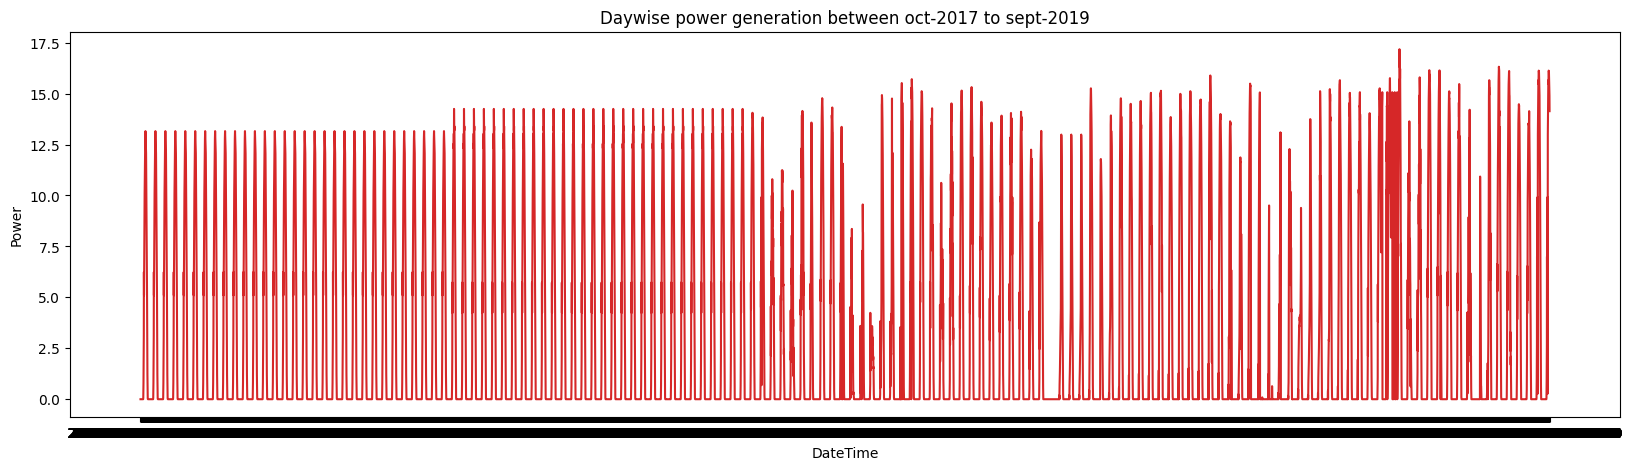

In [34]:
start_date = '2017-10-01'
end_date = '2019-09-30'
mask = (df_weather_actual.datetime_local > start_date) & (df_weather_actual.datetime_local <= end_date)
df_mask = df_weather_actual.loc[mask]
plot_df(df_mask, x=df_mask.datetime_local, y=df_mask.power, title='Daywise power generation between oct-2017 to sept-2019') 

### EDA for numerical features

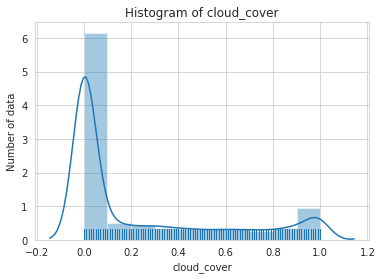

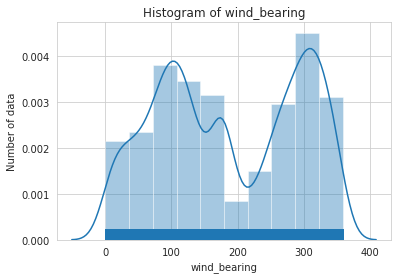

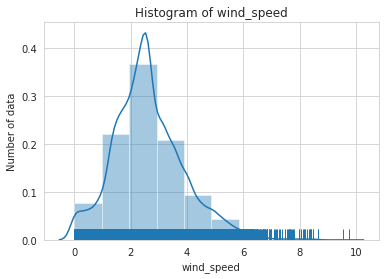

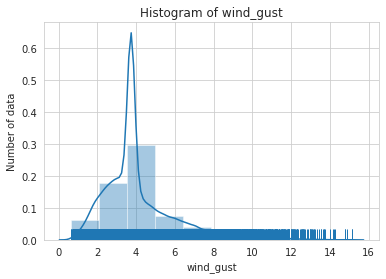

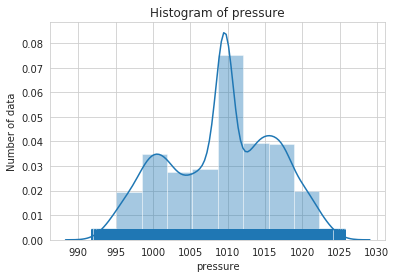

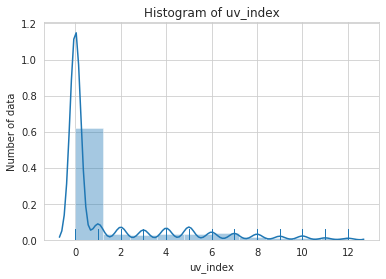

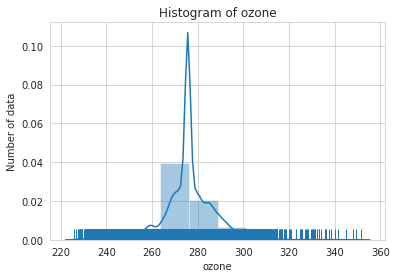

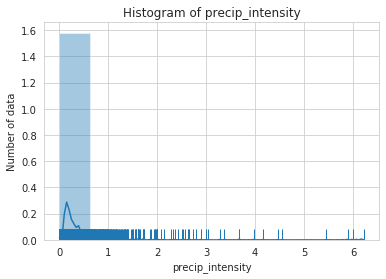

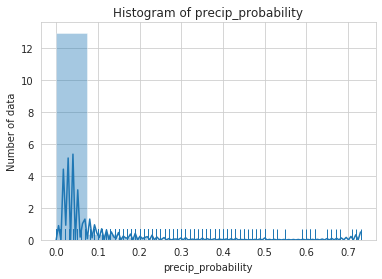

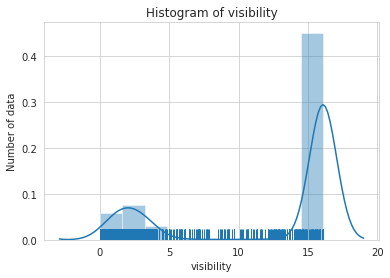

In [45]:
def plot_density_hist(df_weather_actual, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df_weather_actual[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of data')# Set text for y axis
        plt.show()
        
plot_density_hist(df_weather_actual, num_cols, hist=True)        

1. cloud_cover, wind_speed, wind_gust, uv_index, precip_intensiy, precip_probability all are right skewed
2. visibility, wind_bearing and some extend cloud_cover having 2 different mean values
3. precip_intensity and precip_probability having similar kind of graph we can assume that take any one of them while feature selection

C:\Users\HP\AppData\Local\Temp\ipykernel_3372\3573840129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vals)


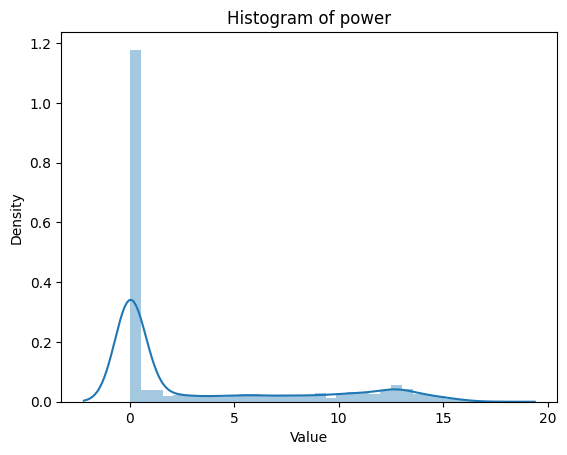

In [35]:
def hist_plot(vals, lab):
    ## Distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of ' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')
    
#labels = np.array(auto_prices['price'])
hist_plot(df_weather_actual['power'], 'power')

here we see power generation is highly right skewed

### EDA for categorical features

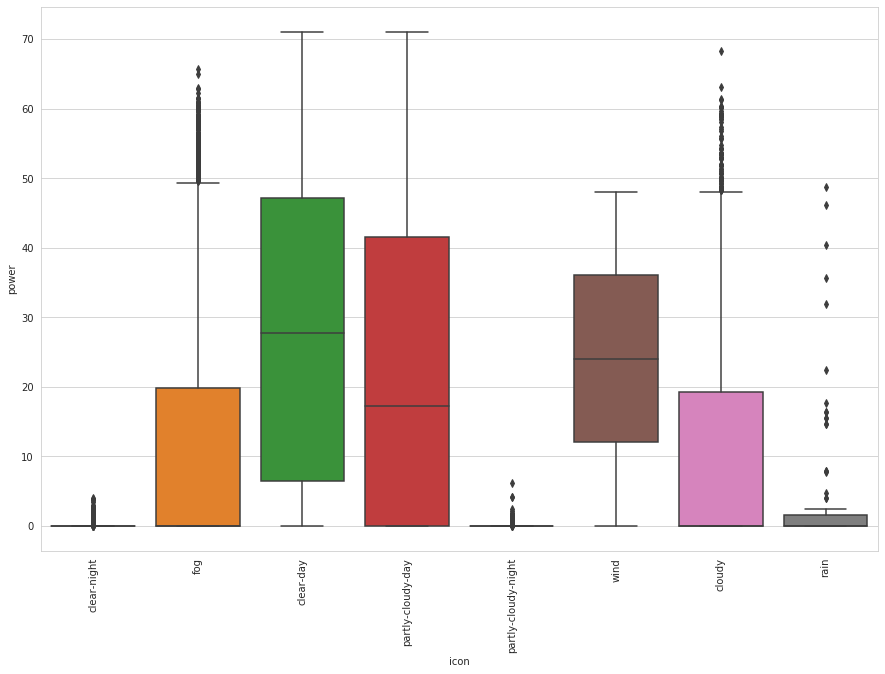

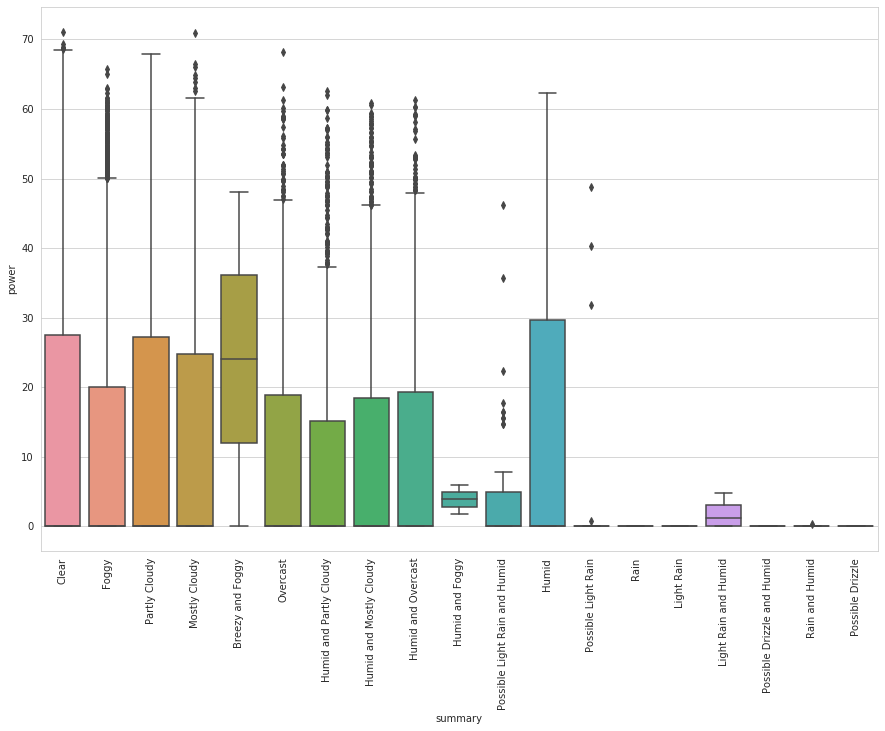

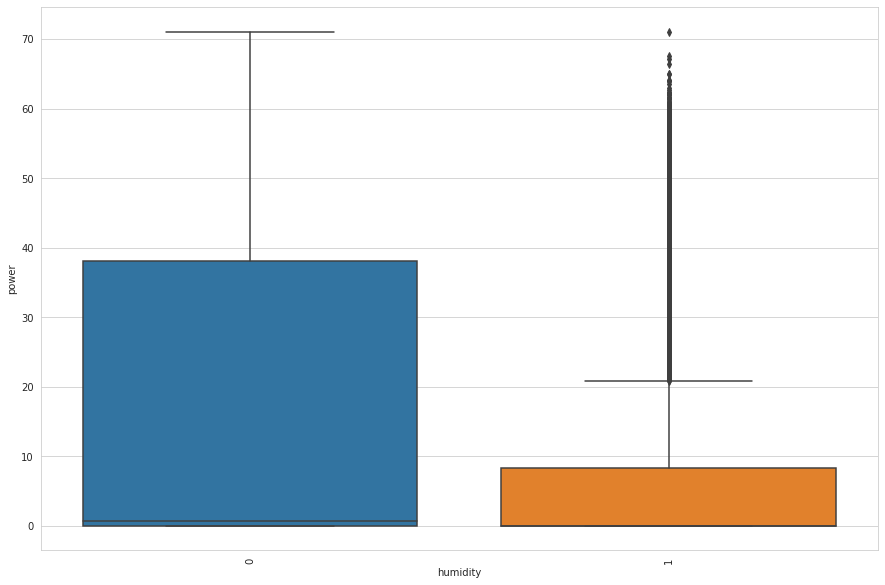

In [166]:
def plot_box(df_weather_actual, cols, col_y = 'power'):
    for col in cols:
        _ = plt.figure(figsize = (15,10))
        sns.set_style("whitegrid")
        ax = sns.boxplot(col, col_y, data=df_weather_actual, orient='v')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['icon','summary','humidity']
plot_box(df_weather_actual, cat_cols)    

`icon` categories expected to perform well while model building because all the categoies having different behaviour towards power generation.     
`summary` can do predict but not at that extend as `icon` because most of the categories having same boxplots means similar bveaviour towards power.            
`humidity` is important as 0,1 seems to play different job on power

In [36]:
num_cols = ["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone","visibility","log_power"] 
# sns.pairplot(df_weather_actual[num_cols], palette="Set2", diag_kind="kde", size=2).map_upper(sns.kdeplot, cmap="Blues_d")
def plot_desity_2d(df_weather_actual, cols, col_y = 'power', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=df_weather_actual, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(df_weather_actual, num_cols)      

TypeError: jointplot() got multiple values for argument 'data'

### Correlation coefficients of all features

The correlation matrix shows some multicollinearity between variables, as well as many weak correlations.

In [37]:
# Feature correlation for all features
plt.figure(figsize=(21, 13))
sns.heatmap(df_weather_actual.corr(), cmap='Greens', annot=True)
plt.title('Feature correlation');

ValueError: could not convert string to float: '2017-09-30 18:30:00'

<Figure size 2100x1300 with 0 Axes>

`uv_index` contributes more to power.     
`apprent_temperature` and `temperature` are similar, we can take any one of them while model building      
all other features contributes to power but less

## Applying Linear Regression

In [38]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

ModuleNotFoundError: No module named 'sklearn'

In [57]:
print(df_weather_actual['icon'].value_counts())
print(df_weather_actual['summary'].value_counts())
print(df_weather_actual['humidity'].value_counts())

clear-night            3075
clear-day              2997
fog                    2920
partly-cloudy-day      1768
partly-cloudy-night    1458
cloudy                 1305
rain                     94
wind                      2
Name: icon, dtype: int64
Clear                            5567
Foggy                            2918
Partly Cloudy                    1179
Humid and Mostly Cloudy           826
Humid and Overcast                714
Mostly Cloudy                     638
Overcast                          591
Humid and Partly Cloudy           583
Humid                             505
Possible Light Rain and Humid      52
Possible Light Rain                20
Rain and Humid                     13
Light Rain and Humid                4
Humid and Foggy                     2
Rain                                2
Breezy and Foggy                    2
Possible Drizzle and Humid          1
Possible Drizzle                    1
Light Rain                          1
Name: summary, dtype: int64
1

we are going to select only `icon` and `humidity` as categorical features, `summary` having larger categories with imbalance data would not able to perform while training model

In [58]:
print(df_weather_actual['icon'].unique())
Features = df_weather_actual['icon']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['clear-night' 'fog' 'clear-day' 'partly-cloudy-day' 'partly-cloudy-night'
 'wind' 'cloudy' 'rain']
[1 3 3 ... 5 5 5]


In [59]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
print(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

[[1]
 [3]
 [3]
 ...
 [5]
 [5]
 [5]]


/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [60]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['humidity']

for col in categorical_columns:
    temp = encode_string(df_weather_actual[col])
    Features = np.concatenate([Features, temp], axis = 1)
    #print(Features)

print(Features.shape)
print(Features[:2, :])    

(13619, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [61]:
Features = np.concatenate([Features, np.array(df_weather_actual[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])], axis = 1)
Features[:2,:]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.6520e+01, 1.9460e+01, 3.0800e+02, 3.7400e+00, 1.0079e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.5700e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.8780e+01, 2.0060e+01, 1.7700e+02, 3.7400e+00, 1.0096e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.0600e+00]])

In [62]:
# Features = np.array(df_weather_actual[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])

## Split the dataset

In [63]:
## Randomly sample cases to create independent training and test data
nr.seed(9922)
labels = np.array(df_weather_actual['power'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.25)
# print(indx)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

## Rescale Numeric features

In [64]:
scaler = preprocessing.StandardScaler().fit(x_train[:,10:])
x_train[:,10:] = scaler.transform(x_train[:,10:])
x_test[:,10:] = scaler.transform(x_test[:,10:])
print(x_train.shape)
x_train[:10,:]

# scaler = preprocessing.StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# print(x_train.shape)
# x_train[:5,:]

(10214, 19)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.15409846,  0.03586713, -0.91935444, -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.42906665],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         1.37280275,  1.53016334, -0.91935444, -0.0062695 , -1.15013152,
        -0.53378234, -0.45787869, -0.28499319,  0.60281425],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.94201072,  0.03586713,  0.7647048 , -0.19890009,  0.06892706,
        -0.53378234,  0.06510269, -0.28499319, -1.79334808],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.857

In [65]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

## Intially empty your model folder

In [66]:
import os
for x in os.listdir('./models'):
    os.remove('./models/'+x)

In [67]:
from sklearn.externals import joblib 
  
filename = str(int(time.time())) + '_model_' + 'linear_mod.pkl'  
# Save the model as a pickle in a file 
joblib.dump(lin_mod, './models/'+filename) 

/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['./models/1585025367_model_linear_mod.pkl']

In [68]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 2.35484617e+12  2.35484617e+12  2.35484617e+12  2.35484617e+12
  2.35484617e+12  2.35484617e+12  2.35484617e+12  2.35484617e+12
 -2.35484617e+12 -2.35484617e+12  3.52071177e+00  1.10005493e+00
  9.76844068e-01  2.46851045e-01  5.36755952e+00  1.06960212e+01
 -4.21285070e-01 -1.75698835e-01 -3.12551958e+00]


In [69]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
    return sklm.mean_squared_error(y_true, y_predicted), r2
   
y_score = lin_mod.predict(x_test) 
y_score = [x if x > 0 else 0 for x in y_score]
(rmse, r2) = print_metrics(y_test, y_score, 28)    

Mean Square Error      = 159.4473832821396
Root Mean Square Error = 12.62724765268107
Mean Absolute Error    = 8.565265302090369
Median Absolute Error  = 6.149368016468031
R^2                    = 0.5772948572937608
Adjusted R^2           = 0.5739152189007882


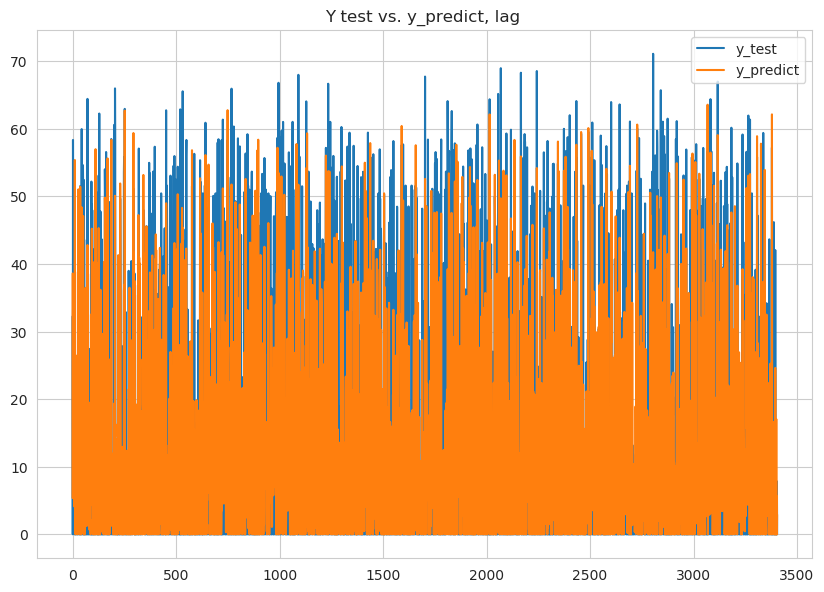

In [70]:
def plot_res(y_test, y_score, label_test, label_score, dpi=100):
    plt.figure(figsize=(10,7), dpi=dpi)
    plt.plot(y_test, label=label_test)
    plt.plot(y_score, label=label_score)
    plt.legend(loc=1)
    plt.title('Y test vs. y_predict, lag ' )
    plt.show()
    
plot_res(y_test, y_score, label_test = 'y_test', label_score='y_predict')

In [71]:
model_results = []

In [72]:
# Save all the results
    
model_results_dict = {}
    
model_results_dict['Algo'] = 'Linear Regression'
model_results_dict['lag'] = 'NA'
model_results_dict['dropout'] = 'NA'
model_results_dict['epochs'] = 'NA'
model_results_dict['batch_size'] = 'NA'
model_results_dict['loss'] = 'NA'
model_results_dict['rmse'] = rmse
model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
model_results_dict['r2'] = r2
model_results_dict['model_filename'] = filename
model_results_dict['time_ran'] = int(time.time())
model_results.append(model_results_dict)

In [73]:
new_res_df = pd.DataFrame(model_results)
new_res_df.to_csv('./result/result.csv')

## Applying LSTM

In [74]:
x_train.shape

(10214, 19)

The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

1. Samples. One sequence is one sample. A batch is comprised of one or more samples.
2. Time Steps. One time step is one point of observation in the sample.
3. Features. One feature is one observation at a time step.

In [75]:
X_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
X_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
X_train.shape

(10214, 1, 19)

Train on 10214 samples, validate on 3405 samples
Epoch 1/10
10214/10214 [==============================] - 15s 1ms/sample - loss: 389.7880 - val_loss: 265.5232
Epoch 2/10
10214/10214 [==============================] - 5s 460us/sample - loss: 229.5014 - val_loss: 186.3598
Epoch 3/10
10214/10214 [==============================] - 5s 500us/sample - loss: 181.1806 - val_loss: 157.0058
Epoch 4/10
10214/10214 [==============================] - 5s 462us/sample - loss: 167.5408 - val_loss: 146.6474
Epoch 5/10
10214/10214 [==============================] - 8s 753us/sample - loss: 161.3683 - val_loss: 142.4271
Epoch 6/10
10214/10214 [==============================] - 10s 946us/sample - loss: 158.4620 - val_loss: 140.2934
Epoch 7/10
10214/10214 [==============================] - 9s 846us/sample - loss: 157.5578 - val_loss: 138.3335
Epoch 8/10
10214/10214 [==============================] - 10s 964us/sample - loss: 155.7989 - val_loss: 136.8939
Epoch 9/10
10214/10214 [==============================

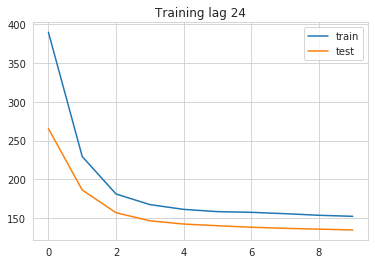

Mean Square Error      = 134.82610396338674
Root Mean Square Error = 11.611464333295208
Mean Absolute Error    = 6.970220629080103
Median Absolute Error  = 2.569681339263916
R^2                    = 0.6425674329473082
Adjusted R^2           = 0.6397096659024688


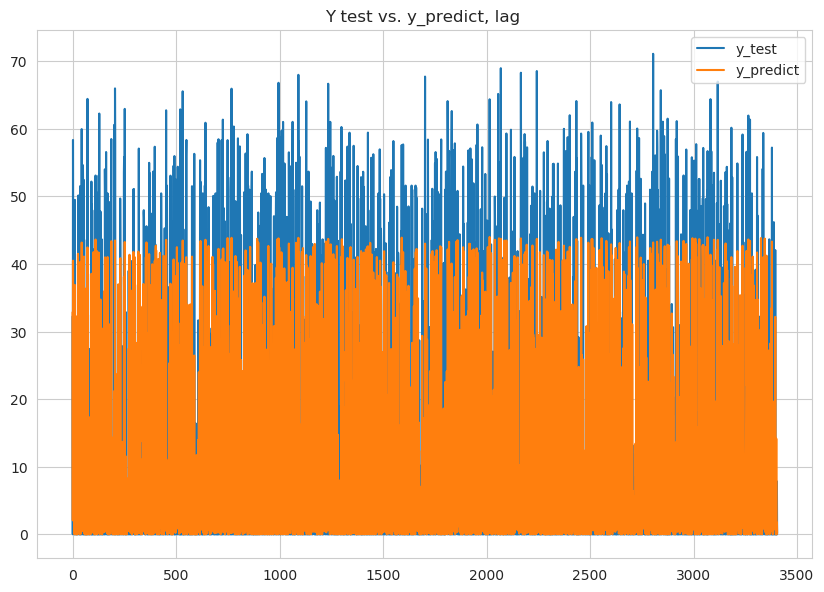

In [76]:
def LSTM_model(X_train, y_train, X_test, y_test,batch_size_= 12, dropout_=.3,epochs_=10, samples=24):
    

    # comment out this box and uncomment load_model to load saved model
    #################################################################################
                                                                                    #
    # design network                                                                #
    model = Sequential()                                                            #
    model.add(LSTM(int(samples), input_shape=(X_train.shape[1], X_train.shape[2]))) #
    model.add(Dropout(dropout_))                                                    #
    model.add(Dense(1))                                                             #
    model.compile(loss='mean_squared_error', optimizer='adam')                      #
                                                                                    #
    # fit network                                                                   #
    history = model.fit(X_train,                                                    #
                        y_train,                                                    #
                        epochs=epochs_,                                             #
                        batch_size=batch_size_,                                     #
                        validation_data=(X_test, y_test),                           #
                        verbose=1,                                                  #
                        shuffle=False)                                              #
                                                                                    #
    # Save model for later                                                          #
    filename = str(int(time.time())) + '_model_' + str(samples) + '_lag.h5'         #
    model.save('./models/' + filename)                                              #
                                                                                    #
    #################################################################################

    # uncomment to load 
    #model = load_model('./models/1539911055_model_672_lag.h5')

    # plot history
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.title('Training lag ' + str(samples))
    plt.show()
    
    y_score = model.predict(X_test) 
    y_score = [x if x > 0 else 0 for x in y_score]
    (rmse, r2) = print_metrics(y_test, y_score, 28)
    plot_res(y_test, y_score, label_test = 'y_test', label_score='y_predict')
    
    # Save all the results
    
    model_results_dict = {}

    model_results_dict['Algo'] = 'LSTM'
    model_results_dict['lag'] = samples
    model_results_dict['dropout'] = dropout_
    model_results_dict['epochs'] = epochs_
    model_results_dict['batch_size'] = batch_size_
    model_results_dict['loss'] = history.history
    model_results_dict['rmse'] = rmse
    model_results_dict['power_gen_rmse'] = math.sqrt(rmse)
    model_results_dict['r2'] = r2
    model_results_dict['model_filename'] = filename
    model_results_dict['time_ran'] = int(time.time())
    model_results.append(model_results_dict)
    

LSTM_model(X_train,y_train, X_test,y_test)

## Test LSTM model for different parameters

Train on 10214 samples, validate on 3405 samples
Epoch 1/10
10214/10214 [==============================] - 30s 3ms/sample - loss: 215.2844 - val_loss: 152.3064
Epoch 2/10
10214/10214 [==============================] - 23s 2ms/sample - loss: 160.7166 - val_loss: 142.6166
Epoch 3/10
10214/10214 [==============================] - 23s 2ms/sample - loss: 152.3933 - val_loss: 136.7992
Epoch 4/10
10214/10214 [==============================] - 25s 2ms/sample - loss: 148.1321 - val_loss: 134.6984
Epoch 5/10
10214/10214 [==============================] - 24s 2ms/sample - loss: 146.3388 - val_loss: 133.6075
Epoch 6/10
10214/10214 [==============================] - 24s 2ms/sample - loss: 144.9917 - val_loss: 133.1831
Epoch 7/10
10214/10214 [==============================] - 24s 2ms/sample - loss: 144.5489 - val_loss: 132.6556
Epoch 8/10
10214/10214 [==============================] - 25s 2ms/sample - loss: 143.7468 - val_loss: 132.1908
Epoch 9/10
10214/10214 [==============================] - 23s 2

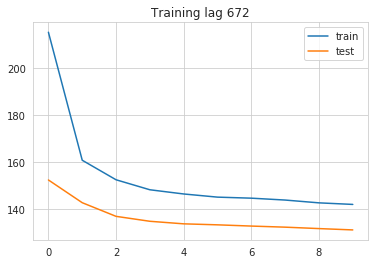

Mean Square Error      = 130.74405940675533
Root Mean Square Error = 11.434336859072998
Mean Absolute Error    = 6.6891303464407095
Median Absolute Error  = 2.4006800651550293
R^2                    = 0.6533891923975141
Adjusted R^2           = 0.6506179481555043


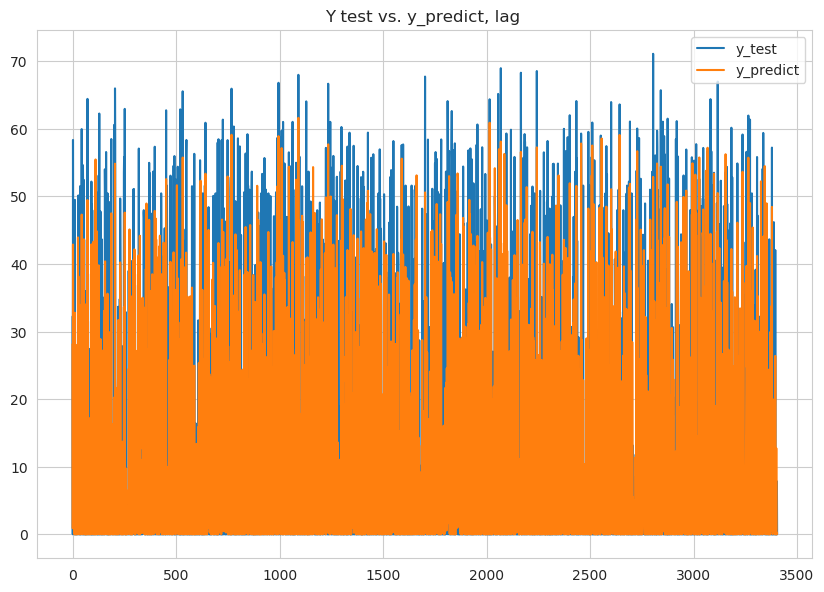

In [82]:
batch_size_ = 12
dropout_ =0.33
epochs_ = 10
samples = 672

LSTM_model(X_train,y_train, X_test,y_test, batch_size_, dropout_, epochs_, samples)

In [85]:
model_results

[{'Algo': 'Linear Regression',
  'lag': 'NA',
  'dropout': 'NA',
  'epochs': 'NA',
  'batch_size': 'NA',
  'loss': 'NA',
  'rmse': 159.4473832821396,
  'power_gen_rmse': 12.62724765268107,
  'r2': 0.5772948572937608,
  'model_filename': '1585025367_model_linear_mod.pkl',
  'time_ran': 1585025385},
 {'Algo': 'LSTM',
  'lag': 24,
  'dropout': 0.3,
  'epochs': 10,
  'batch_size': 12,
  'loss': {'loss': [389.788047026136,
    229.50143428359547,
    181.18062914013046,
    167.5408136878715,
    161.36832291920732,
    158.46203542983483,
    157.5577985101748,
    155.79888421251556,
    153.75110002191468,
    152.41404136174435],
   'val_loss': [265.52316670942935,
    186.35983595743053,
    157.00581502956442,
    146.64736856552997,
    142.42711484127634,
    140.29338709289283,
    138.33347397858876,
    136.89393095697076,
    135.86919951081802,
    134.87796275941287]},
  'rmse': 134.82610396338674,
  'power_gen_rmse': 11.611464333295208,
  'r2': 0.6425674329473082,
  'model_fi

In [86]:
new_res_df = pd.DataFrame(model_results)
# old_res_df = pd.read_csv('./result/result.csv', index_col=0)
# res_df = pd.concat([old_res_df, new_res_df], axis=0, sort=False).reset_index(drop=True)
new_res_df.to_csv('./result/result.csv')

In [87]:
models_by_r2 = new_res_df.sort_values(by='r2', ascending=False)
models_by_r2.head()

,Algo,lag,dropout,epochs,batch_size,loss,rmse,power_gen_rmse,r2,model_filename,time_ran
5,LSTM,672,0.33,10,12,"{'loss': [215.28440441230003, 160.716649126068...",130.744059,11.434337,0.653389,1585026480_model_672_lag.h5,1585026483
3,LSTM,96,0.3,10,12,"{'loss': [281.5728830825986, 162.7487836252903...",130.752578,11.434709,0.653367,1585025994_model_96_lag.h5,1585025997
4,LSTM,240,0.3,10,12,"{'loss': [240.34701867971444, 160.387463751804...",130.821802,11.437736,0.653183,1585026192_model_240_lag.h5,1585026196
2,LSTM,48,0.3,10,12,"{'loss': [331.5907426807356, 180.8230021528845...",131.486704,11.466765,0.651420,1585025788_model_48_lag.h5,1585025791
1,LSTM,24,0.3,10,12,"{'loss': [389.788047026136, 229.50143428359547...",134.826104,11.611464,0.642567,1585025560_model_24_lag.h5,1585025563


In [88]:
model_filename = models_by_r2['model_filename'].iloc[0]
if(model_filename.endswith('.pkl')):
    model = joblib.load('./models/'+ model_filename)
else:
    model = load_model('./models/'+ model_filename)

## Predicting weather forecast data

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

In [128]:
df_forecast = pd.read_csv('weather_forecast.csv')
df_forecast.head()

# Concat y_hat to dataframe for later
#     lstm_test = pd.concat([lstm_test, pd.DataFrame(yhat, columns=['yhat'], index=lstm_test.index)], axis=1)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,NaN,6.42,NaN,1008.45,NaN,0,NaN,NaN,NaN,268.6,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,NaN,6.28,NaN,1008.24,NaN,0,NaN,NaN,NaN,269.1,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,NaN,6.08,NaN,1007.90,NaN,0,NaN,NaN,NaN,269.7,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,NaN,5.74,NaN,1007.61,NaN,0,NaN,NaN,NaN,270.4,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,NaN,5.30,NaN,1007.51,NaN,0,NaN,NaN,NaN,271.3,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [129]:
df_forecast.isna().sum()

Unnamed: 0                0
plant_id                  0
datetime_utc              0
datetime_local            0
cloud_cover               0
apparent_temperature      0
temperature               0
humidity                  0
dew_point                 0
wind_bearing              0
wind_speed                0
wind_chill              648
wind_gust                 0
heat_index              648
pressure                  0
qpf                     648
uv_index                  0
snow                    648
pop                     648
fctcode                 648
ozone                     0
precip_accumulation     648
precip_intensity          0
precip_probability        0
precip_type             534
visibility                0
sunrise                   0
sunset                    0
icon                      0
summary                   0
updated_at                0
dtype: int64

In [130]:
## drop columns having null values as we see above wind_chill, heat_index etc having larger null values
df_forecast = df_forecast.drop(columns=['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation'])
df_forecast.shape

(648, 24)

In [133]:
# del df_weather_actual['power']

In [134]:
df_weather_actual.head(10)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.74,1007.90,0.0,275.6,0.0,0.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.74,1008.12,0.0,275.6,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
5,5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
6,6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,177.0,2.52,3.74,1008.65,0.0,275.6,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16
7,7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16
8,8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16
9,9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237.0,0.60,3.74,1009.95,0.0,275.6,0.0,0.0,rain,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16


In [135]:
df_weather_actual.shape

(13619, 24)

In [136]:
df_weather_actual_total = pd.concat([df_weather_actual, df_forecast], axis=0, sort=False).reset_index(drop=True)

In [137]:
df_weather_actual_total.tail(10)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
14257,638,1,2019-10-27 08:30:00,2019-10-27 14:00:00,0.0,32.40,32,0,7.83,323.0,3.57,3.76,1011.51,5.0,266.9,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28
14258,639,1,2019-10-27 09:30:00,2019-10-27 15:00:00,0.0,32.06,32,0,7.23,337.0,3.44,3.70,1010.58,3.0,266.5,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28
14259,640,1,2019-10-27 10:30:00,2019-10-27 16:00:00,0.0,32.01,32,0,7.26,343.0,3.01,3.43,1010.33,1.0,266.1,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28
14260,641,1,2019-10-27 11:30:00,2019-10-27 17:00:00,0.0,31.08,31,0,7.67,348.0,2.50,3.14,1010.47,0.0,265.4,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-day,Clear,2019-10-28 12:33:28
14261,642,1,2019-10-27 12:30:00,2019-10-27 18:00:00,0.0,29.41,29,0,10.03,348.0,2.11,2.96,1011.02,0.0,264.9,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28
14262,643,1,2019-10-27 13:30:00,2019-10-27 19:00:00,0.0,27.23,27,0,12.20,345.0,1.74,2.85,1011.70,0.0,264.9,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28
14263,644,1,2019-10-27 14:30:00,2019-10-27 20:00:00,0.0,25.23,25,0,12.06,353.0,1.39,2.73,1012.28,0.0,264.9,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28
14264,645,1,2019-10-27 15:30:00,2019-10-27 21:00:00,0.0,23.75,24,0,12.19,29.0,1.15,2.55,1012.67,0.0,264.6,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28
14265,646,1,2019-10-27 16:30:00,2019-10-27 22:00:00,0.0,22.86,23,1,12.50,92.0,1.03,2.33,1012.79,0.0,264.3,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28
14266,647,1,2019-10-27 17:30:00,2019-10-27 23:00:00,0.0,22.21,22,1,12.67,146.0,0.91,2.01,1012.85,0.0,262.8,0.0,0.0,NaN,16.09,2019-10-27 01:07:31,2019-10-27 12:18:06,clear-night,Clear,2019-10-28 12:33:28


In [139]:
# df_weather_actual_total.to_csv('weather_actual_total.csv')

In [140]:
df_weather_actual_total = pd.read_csv('weather_actual_total.csv')


In [141]:
print(df_weather_actual_total['icon'].unique())
Features_forecast_total = df_weather_actual_total['icon']
enc = preprocessing.LabelEncoder()
enc.fit(Features_forecast_total)
Features_forecast_total = enc.transform(Features_forecast_total)
print(Features_forecast_total)

['clear-night' 'fog' 'clear-day' 'partly-cloudy-day' 'partly-cloudy-night'
 'wind' 'cloudy' 'rain']
[1 3 3 ... 1 1 1]


In [142]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features_forecast_total.reshape(-1,1))
print(Features_forecast_total.reshape(-1,1))
Features_forecast_total = encoded.transform(Features_forecast_total.reshape(-1,1)).toarray()
Features_forecast_total[:10,:]

[[1]
 [3]
 [3]
 ...
 [1]
 [1]
 [1]]


/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [143]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['humidity']

for col in categorical_columns:
    temp = encode_string(df_weather_actual_total[col])
    Features_forecast_total = np.concatenate([Features_forecast_total, temp], axis = 1)
    #print(Features)

print(Features_forecast_total.shape)
print(Features_forecast_total[:2,:])    

(14267, 10)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


/home/ins/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [144]:
Features_forecast_total = np.concatenate([Features_forecast_total, np.array(df_weather_actual_total[["apparent_temperature", "dew_point", "wind_bearing", "wind_gust", "pressure", "uv_index","ozone",'precip_probability',"visibility"]])], axis = 1)
Features_forecast_total[:2,:]

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.6520e+01, 1.9460e+01, 3.0800e+02, 3.7400e+00, 1.0079e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.5700e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.8780e+01, 2.0060e+01, 1.7700e+02, 3.7400e+00, 1.0096e+03,
        0.0000e+00, 2.7560e+02, 0.0000e+00, 3.0600e+00]])

In [145]:
scaler = preprocessing.StandardScaler().fit(Features_forecast_total[:,10:])
Features_forecast_total[:,10:] = scaler.transform(Features_forecast_total[:,10:])
print(Features_forecast_total.shape)
Features_forecast_total[:10,:]

(14267, 19)


array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.04881573,  0.82533537,  1.13017315, -0.18634421, -0.19471093,
        -0.53704436,  0.06291183, -0.28000661, -1.46711103],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.26863544,  0.89220688, -0.08343618, -0.18634421,  0.04844815,
        -0.53704436,  0.06291183, -0.28000661, -1.55080153],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.05465165,  0.88217616, -0.08343618, -0.18634421,  0.04844815,
        -0.53704436,  0.06291183, -0.28000661, -1.55080153],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.211

In [146]:
if(model_filename.endswith('.h5')):
    Features_forecast_total = Features_forecast_total.reshape((Features_forecast_total.shape[0], 1,Features_forecast_total.shape[1]))
    # make a prediction
    res = model.predict(Features_forecast_total)
    # print(res)
    # sets floor for res
    res = [x[0] if x > 0 else 0 for x in res]
else:
    # make a prediction
    res = model.predict(Features_forecast_total)
    # print(res)
    # sets floor for res
    res = [x if x > 0 else 0 for x in res]

In [147]:
# Concat res to dataframe for later
df_weather_actual_total = pd.concat([df_weather_actual_total, pd.DataFrame(res, columns=['predicted_power'], index=df_weather_actual_total.index)], axis=1)
df_weather_actual_total.head(10)

,Unnamed: 0,Unnamed: 0.1,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at,predicted_power
0,0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308.0,0.83,3.74,1007.90,0.0,275.6,0.0,0.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.000000
1,1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,9.572026
2,2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,7.288108
3,3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270.0,0.45,3.74,1008.12,0.0,275.6,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.000000
4,4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,6.048957
5,5,5,1,2017-09-30 23:30:00,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,6.048957
6,6,6,1,2017-10-01 00:30:00,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,177.0,2.52,3.74,1008.65,0.0,275.6,0.0,0.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.000000
7,7,7,1,2017-10-01 01:30:00,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,7.303276
8,8,8,1,2017-10-01 02:30:00,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,177.0,2.52,3.74,1009.60,0.0,275.6,0.0,0.0,rain,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,15.429638
9,9,9,1,2017-10-01 03:30:00,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237.0,0.60,3.74,1009.95,0.0,275.6,0.0,0.0,rain,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,2019-07-16 16:37:16,19.034294


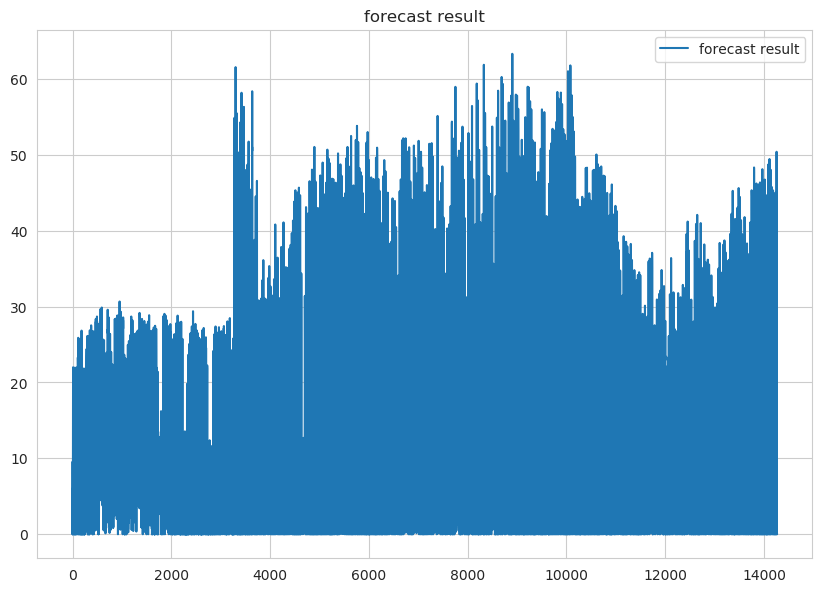

In [148]:
plt.figure(figsize=(10,7), dpi=100)
plt.plot(res, label='forecast result')
plt.legend(loc=1)
plt.title('forecast result' )
plt.show()

In [149]:
df_weather_actual_total.to_csv('weather_forecast_total_result.csv', index = False, header = True)

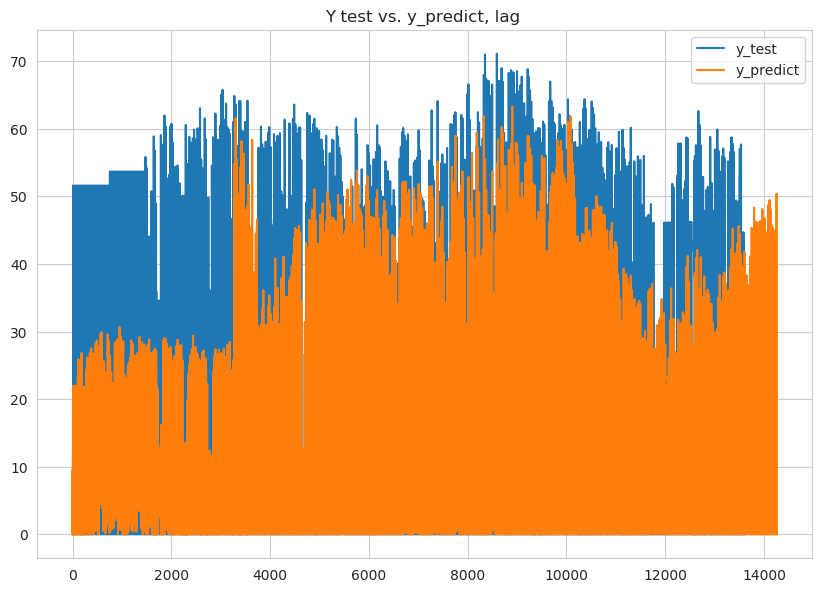

In [150]:
df_weather_actual = pd.read_csv('weather_actuals_prepared1.csv')
test = [x for x in df_weather_actual['power']]
plot_res(test, res, label_test = 'y_test', label_score='y_predict')

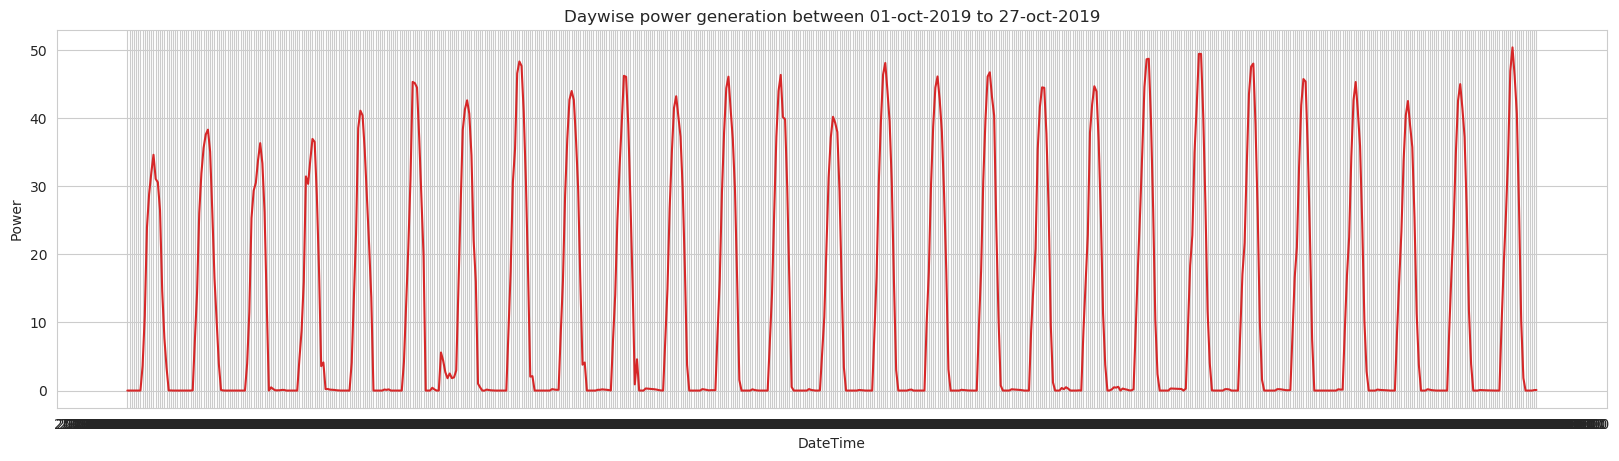

In [151]:
df_forecast = pd.read_csv('Data/weather_forecast.csv')
start_date = '2019-10-01'
end_date = '2019-10-28'
mask = (df_weather_actual_total.datetime_local >= start_date) & (df_weather_actual_total.datetime_local <= end_date)
df_mask = df_weather_actual_total.loc[mask]
# print(df_mask)
plot_df(df_mask, x=df_mask.datetime_local, y=df_mask.predicted_power, title='Daywise power generation between 01-oct-2019 to 27-oct-2019') 
df_forecast['power'] = [round(x,2) for x in df_mask.predicted_power]
df_forecast.to_csv('forecast_result.csv')